### Spectroscopic Data Analysis
        Sean Keenan, PhD Physics
        Quantum Memories Group, Heriot-Watt University, Edinburgh
        2021

In [1]:
import os, re
import numpy as np
from natsort import natsorted
import matplotlib.pyplot as mp
import scipy.interpolate as si
import scipy.signal as ss
import scipy.ndimage as nd
import spec_funcs as sf
from scipy.fftpack import rfft, irfft, fftfreq
from statistics import mean


##### Set-up script
        Select input folder and polarisation

In [2]:
# change to gui at later date
# polarisations as written in file names
polarisations = ["128", "140", "160", "173"]#["86", "100", "110", "131"]#["130", "136", "142", "150", "160", "170", "181"]##["270", "280", "290","300","310","320"]#["128", "140", "160", "173"]# #["130", "152", "174"]#["270", "280", "290","300","310","320"]

# folder containing all the requisite subfolders and data - refrences included
path = "C:\\Users\\sk88\\Desktop\\0222 BB"

# choose to focus on a particular wavelength range
zoom = True
lower = 560
upper = 650

# mark energies / wavelengths of interest
view = True
woi = [594.24, 603.23, 604.47]

# value to shift each OD
shifter = 0.2
# correction value for reference power
correction = 1

# save images 
save_fig = False

# reference names
refs = ['ref', 'reference', 'R']

# file extension types
exts = ".csv", ".txt", ".CSV"
exceptions = "notes", "setup"

# initialise lists
file_list = []
folder_list = []
bg_wavelengths = []
bg_Is = []
wave_sets = []
I_sets= []
I_0 = []
freq = []
OD = []
starts = []
stops = []

##### Import Raw Spectroscopy Data
        Load raw data from csv file (delimiter is not a problem) and sort into groups - polarisations -> reference / spectrum


In [3]:
# holder removes first folder from lists so only actual data is used
holder = 0
# walk through directory and extract all relevant files
for root, dirs, files in natsorted(os.walk(path)):
    if holder == 1:
        folder_list.append(root)
        temp = []
        for file in files:
            if(file.endswith(exts)):
                # ignore collection data notes
                if any([x in file for x in exceptions]):
                    continue
                else:
                    temp.append(file)
        file_list.append(temp)
    else:
        holder = 1
        
#folder_list = natsorted(folder_list)
'''
filter through files and seperate transmission data into groups:
polarisation > references > separators eg. temperature > transmission sets
'''
for polarisation in polarisations:
    wavelengths = []
    Is = []
    for index, folder in enumerate(folder_list):
        for file in file_list[index]:
            dataset = os.path.join(folder, file)
            if polarisation in file:
                # check for reference data
                #TO DO flag if no reference!
                if any(string in refs for string in file):
                    bg_temp_wave = []
                    bg_temp_I = []
                    with open(dataset, 'r', newline='') as raw_file:
                        for row in raw_file:
                            if sf.check_str(row) == True:
                                temp = re.split('\t|,|;', row)
                                bg_temp_wave.append(float(temp[0]))
                                bg_temp_I.append(float(temp[1]))
                        raw_file.close()
                    bg_wavelengths.append(bg_temp_wave)
                    bg_Is.append(bg_temp_I)
                else:
                    temp_wave = []
                    temp_I =[]
                    with open(dataset, 'r', newline='') as raw_file:
                        for row in raw_file:
                            if sf.check_str(row) == True:
                                temp = re.split('\t|,|;', row)
                                temp_wave.append(float(temp[0]))
                                temp_I.append(float(temp[1]))
                        raw_file.close()
                    wavelengths.append(temp_wave)
                    Is.append(temp_I)
    wave_sets.append(wavelengths)
    I_sets.append(Is)

In [4]:
file_test = natsorted(os.listdir('C:\\Users\\sk88\\Desktop\\0222 BB'))


#####  Calculate OD
        Generate interplolated background data to match raw absorption data length and then calculate Optical Depth

In [5]:
'''
Check lengths of arrays and interpolate reference data for each file - avoids issue of wavelength array length mismatch
'''
# cycle through polarisations
for idx_1 in range(len(polarisations)):
    print(idx_1)
    temp_I_0 = []
    temp_OD = []
    I_temp = []
    # generate spline co-effs
    spline_coeffs = si.splrep(bg_wavelengths[idx_1], bg_Is[idx_1])
    # calculate referenece for each wavelength subset
    for idx_2, wavelength in enumerate(wave_sets[idx_1]):
        spline_temp = (si.splev(wavelength, spline_coeffs))
        I_temp = I_sets[idx_1][idx_2]
        # scale data to remove negative values
        if np.nanmin(spline_temp) < 0 or np.nanmin(I_temp) < 0:
            if np.nanmin(spline_temp) < np.nanmin(I_temp):
                adjust = np.nanmin(spline_temp)
            elif np.nanmin(I_temp) < np.nanmin(spline_temp):
                adjust = np.nanmin(I_temp)
            temp_I_0.append(spline_temp - adjust)
            I_temp -= adjust
        else:
            temp_I_0.append(spline_temp)
        I_temp = [x*correction for x in I_temp]
        temp_OD.append(np.log(temp_I_0[idx_2]/I_temp))
    I_0.append(temp_I_0)
    OD.append(temp_OD)

    # zoom function for wavelength range
if zoom == True:
    for index, waves in enumerate(wave_sets):
        start = []
        stop = []
        for wave in waves:
            for idx, value in enumerate(wave):
                if value <= lower:
                    temp_start = idx
                if value <= upper:
                    temp_stop = idx
            start.append(temp_start)
            stop.append(temp_stop)
        starts.append(start)
        stops.append(stop)
elif zoom != True:
    for index, waves in enumerate(wave_sets):
        start = []
        stop = []
        for wave in waves:
            start.append(0)
            stop.append(-1)
        starts.append(start)
        stops.append(stop)

0
1
2
3


##### Print Raw Output
        Plot individual spectroscopy data

3_2K
10K
20K
30K
37K
60K
80K
100K
120K
160K
180K
200K
220K
240K
260K
280K
3_2K
10K
20K
30K
37K
60K
80K
100K
120K
160K
180K
200K
220K
240K
260K
280K
3_2K
10K
20K
30K
37K
60K
80K
100K
120K
160K
180K
200K
220K
240K
260K
280K
3_2K
10K
20K
30K
37K
60K
80K
100K
120K
160K
180K
200K
220K
240K
260K
280K


c:\Users\sk88\Documents\Python\Spectroscopy\.spect_venv\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':


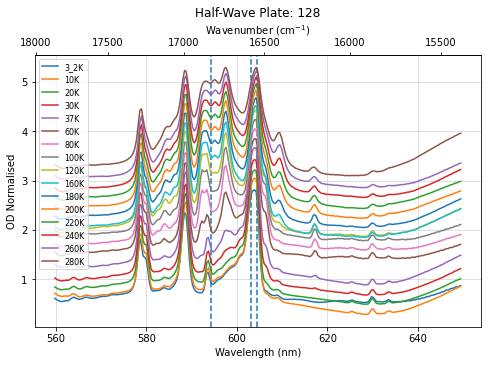

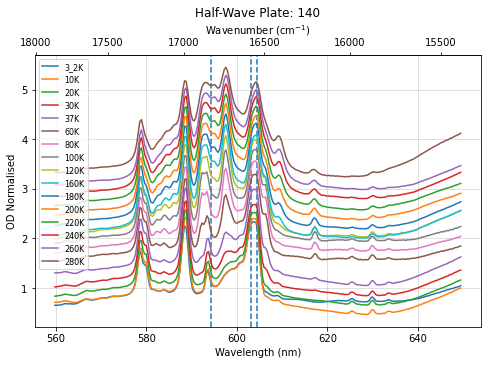

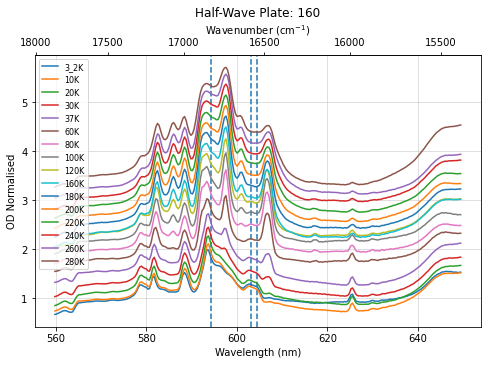

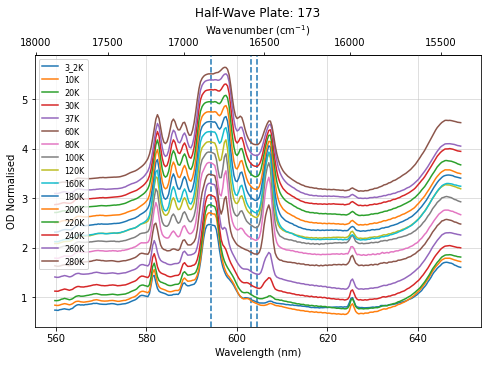

In [6]:
if zoom == False:
    string_format = path + '\\' + str(round(min(bg_wavelengths[0]))) + '_' + str(round(max(bg_wavelengths[0]))) + '_'
else:
    string_format = path + '\\' + str(lower) + '_' + str(upper) + '_'

# create separate plots for each polarisation
for idx_1, polarisation in enumerate(polarisations):
    
    fig_1, ax_1 = mp.subplots(figsize=(8, 5))
    ax_1.set_title(str('Half-Wave Plate: ' + str(polarisation)))
    ax_1.set(xlabel='Wavelength (nm)', ylabel='OD Normalised')
    sec_ax = ax_1.secondary_xaxis('top', functions= (lambda x: 1e7 / x, lambda x: 1e7 / x))
    sec_ax.set_xlabel('Wavenumber (cm$^{-1}$)')
    ax_1.grid(True)
    ax_1.grid(True, color='silver', linewidth=0.5)
    if view == True:
        for value in woi:
            ax_1.axvline(x=value, linestyle='--')
    
    #shift each spectrum by a defined value
    shift = 0
    for idx_2, wave in enumerate(wave_sets[idx_1]):
        lbl = os.path.split(folder_list[idx_2])
        print(lbl[1])
        data = OD[idx_1][idx_2] - np.amin(OD[idx_1][idx_2]) + shift
        ax_1.plot(wave[starts[idx_1][idx_2]:stops[idx_1][idx_2]], data[starts[idx_1][idx_2]:stops[idx_1][idx_2]], color=None, marker=None, linestyle='-', alpha=1, label=lbl[1])
        shift += shifter  
    
    ax_1.legend(loc='upper left', fontsize=8)

    if save_fig == True:
        fig_1.savefig(fname=string_format + str(polarisation) + '.jpg', dpi='figure', format='jpg', bbox_inches='tight')


##### Define ROI and fit to data
        Determine feature profile - Gaussian / Lorentzian and return confidence

In [7]:
# roi bounds (wavelength)
roi_lower = 590
roi_upper = 610

# select to smooth data
smooth = True
sigma = 0.5

# modifiers for peak finding (prominence, distance between peaks)
prom_tol = 0.1
dist = 10

# array to identify indexes for roi
roi_waves = []
roi_ODs = []
peaks = []
smoothed = []
smoothed_peaks = []
for index, waves in enumerate(wave_sets):
    roi_wave_temp = []
    roi_OD_temp = []
    temp_peaks = []
    for index_2, wave in enumerate(waves):
        for idx, value in enumerate(wave):
            if value <= roi_lower:
                temp_start = idx
            if value <= roi_upper:
                temp_stop = idx
        roi_wave_temp.append(np.array(wave[temp_start:temp_stop]))
        roi_OD_temp.append(OD[index][index_2][temp_start:temp_stop])
        peak, _ = ss.find_peaks(roi_OD_temp[index_2], distance=dist, prominence=np.amax(roi_OD_temp[index_2]) * prom_tol)
        temp_peaks.append(peak)
        if smooth == True:
            smoothed_temp = []
            smoothed_peaks_temp = []
            smoothed_temp.append(nd.gaussian_filter(roi_OD_temp[index_2], sigma))
            smoothed_peaks_temp.append(ss.find_peaks(smoothed_temp[index_2], distance=dist, prominence=np.amax(smoothed_temp[index_2]) * prom_tol))
    roi_waves.append(roi_wave_temp)
    roi_ODs.append(roi_OD_temp)
    peaks.append(temp_peaks)
    smoothed.append(smoothed_temp)
    smoothed_peaks.append(smoothed_peaks_temp)

diffs = [np.diff(x) for x in roi_ODs]

if smooth == True:
    gauss_ODs = [nd.gaussian_filter(x, sigma) for x in roi_ODs]

for idx_1, polarisation in enumerate(polarisations):

    fig_2, ax_2 = mp.subplots(figsize=(8, 5))
    ax_2.set_title(str('Half-Wave Plate: ' + str(polarisation)))
    ax_2.set(xlabel='Wavelength (nm)', ylabel='OD Normalised')
    sec_ax = ax_2.secondary_xaxis('top', functions= (lambda x: 1e7 / x, lambda x: 1e7 / x))
    sec_ax.set_xlabel('Wavenumber (cm$^{-1}$)')
    ax_2.grid(True)
    ax_2.grid(True, color='silver', linewidth=0.5)
    
    for idx_2, data in enumerate(roi_waves[idx_1]):
        ax_2.plot(data, roi_ODs[idx_1][idx_2])
        ax_2.plot(data[peaks[idx_1][idx_2]], roi_ODs[idx_1][idx_2][peaks[idx_1][idx_2]], 'bx')
        if smooth == True:
            ax_2.plot(data, smoothed[idx_1][idx_2], '--r')
        print('Peak locations (nm) for Half-Wave Plate ' + polarisation, np.round((data[peaks[idx_1][idx_2]]), decimals=6))

IndexError: list index out of range

In [ ]:
temp = []

for data in roi_ODs:
    temp.append(np.diff(data))

In [ ]:
mp.plot(roi_waves[3][0][25:50], temp[3][0][25:50])
mp.plot(roi_waves[3][0][25:50], roi_ODs[3][0][25:50])

In [ ]:
check_1 = sf.fitgls(roi_waves[4][0][30:50], roi_ODs[4][0][30:50], [0.25, 0.25, 604, 0.5, 0.25, 604, 0.5, 0.5])
check_2 = sf.fitlorentz(roi_waves[4][0][30:50], roi_ODs[4][0][30:50], [0.25, 0.25, 604, 0.5])
check_3 = sf.fitgauss(roi_waves[4][0][30:50], roi_ODs[4][0][30:50], [0.25, 0.25, 604, 0.5])


mp.plot(roi_waves[4][0][30:50], roi_ODs[4][0][30:50], 'xb', label='data')
mp.plot(roi_waves[4][0][30:50], sf.pseudo_voigt(roi_waves[4][0][30:50], *check_1[0]), 'r', label='voigt')
mp.plot(roi_waves[4][0][30:50], sf.lorentzian(roi_waves[4][0][30:50], *check_2[0]), color='orange', label='lorentzian')
mp.plot(roi_waves[4][0][30:50], sf.gaussian(roi_waves[4][0][30:50], *check_3[0]), color='green', label='gaussian')
mp.legend()

In [ ]:
print(((2.998E8/604)*1e-3)-0.920663, ((2.998E8/606)*1e-3)-0.920663)
print((2.998E8/(roi_waves[4][0][41])*1e-3)-0.920663)

In [ ]:
print((((2.998E8/602)*1e-3) - ((2.998E8/606.5)*1e-3)))

In [ ]:
print(check_1[0])

In [ ]:
max = roi_waves[3][0][40] + ((2*np.sqrt(2*np.log(2)) * 1.20598335)/2)
min = roi_waves[3][0][40] - ((2*np.sqrt(2*np.log(2)) * 1.20598335)/2)

fwhm = ((2.998E8/(min*1e-9)) - (2.998E8/(max*1e-9))) *1e-12

print(max, min, fwhm)

In [ ]:
x =np.linspace(-100, 100, 10000)
amp_g = 40
amp_l = 20
y_0 = 0
x_0g = 0
x_0l = 0
gamma = 15
sigma = 15
eta = 0.8
width_g = 2*np.sqrt(2*np.log(2)) * sigma
width_l = 2*gamma

gauss = sf.gaussian(x, amp_g, y_0, x_0g, sigma)
lorentz = sf.lorentzian(x, amp_l, y_0, x_0l, gamma)
noise = np.random.normal(size=np.size(gauss))

voigt = sf.pseudo_voigt(x, y_0, amp_g, x_0g, sigma, amp_l, x_0l, gamma, eta) + noise

mp.plot(x, gauss, 'r', label='gauss')
mp.plot(x, lorentz, 'b', label='lorentz')
mp.plot(x, voigt, 'orange', alpha=0.5, label='voigt')
mp.legend()

In [ ]:
x_1 = x[0:-1]
mp.plot(x_1, np.diff(lorentz, n=1), 'b')
mp.plot(x, lorentz)
mp.axvline(x=x_1[np.argmax(np.diff(lorentz, n=1))], color='blue', linestyle='--')
mp.axvline(x=x_1[np.argmin(np.diff(lorentz, n=1))], color='blue', linestyle='--')
mp.plot(x_1, np.diff(gauss, n=1), 'r')
mp.axvline(x=x_1[np.argmax(np.diff(gauss, n=1))], color='red', linestyle='--')
mp.axvline(x=x_1[np.argmin(np.diff(gauss, n=1))], color='red', linestyle='--')
mp.plot(x, gauss)
mp.axvline(x=15, color='orange', linestyle='-.')


In [ ]:
fit_g = sf.fitgauss(x, voigt)
fit_l = sf.fitlorentz(x, voigt)
fit_v = sf.fitgls(x, voigt)

mp.plot(x, sf.lorentzian(x, *fit_l[0]), '--b', label='lorentz fit')
mp.plot(x, sf.gaussian(x, *fit_g[0]), '--g', label='gauss fit')
mp.plot(x, sf.pseudo_voigt(x, *fit_v[0]), '--r', label='voigt fit')
mp.plot(x, voigt, color='orange', alpha=0.5, label='noisey voigt')
mp.legend()

In [ ]:
start = 25
stop = 56
fitx = np.linspace(start=roi_waves[0][0][start], stop=roi_waves[0][0][stop], num =1000)

datatofit = roi_ODs[0][0][start:stop]
diff = np.diff(roi_ODs[0][0][start:stop], n=1)
mp.figure(1)
mp.plot(diff)
mp.plot(datatofit - 0.4, 'x')

fit_voigt = sf.fitgls(roi_waves[0][0][start:stop], roi_ODs[0][0][start:stop], [0.2, 0.4, 604, 0.2, 0.4, 604, 0.2, 0.5])
fit_gaus = sf.fitgauss(roi_waves[0][0][start:stop], roi_ODs[0][0][start:stop], [0.4, 0.2,604, 0.2])
fit_lore = sf.fitlorentz(roi_waves[0][0][start:stop], roi_ODs[0][0][start:stop], [0.4, 0.2, 604, 0.2])

v = sf.pseudo_voigt(fitx, *fit_voigt[0])
g = sf.gaussian(fitx, *fit_gaus[0])
l = sf.lorentzian(fitx, *fit_lore[0])

mp.figure(2)
mp.plot(roi_waves[0][0][start:stop], roi_ODs[0][0][start:stop], 'x', label='real data')
mp.plot(fitx, v, '--', label='voigt')
mp.plot(fitx, g, '--', label='gaussian')
mp.plot(fitx, l, '--', label='lorentzian')
mp.legend()

print(fit_voigt[1])
print(fit_lore[1])